### BUSINESS CASE

ABC company has spend huge amount of money on RandD, administration, marketing in various states in the US, now the want to predict what will be their profit after spending much on this features




In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#Loading the data
data=pd.read_csv('50_Startups.csv')

In [14]:
data.shape

(50, 5)

The head() function in Pandas will be used to view the first few rows of a Pandas DataFrame or Series. By default, it displays the first 5 rows, but you can also specify the number of rows you want to display by passing an argument to the function.

In [15]:
## Call the dataframe and do basic checks
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [65]:
'''we are going to use the info function in Pandas to provide a 
concise summary of a DataFrame, including the number of non-null
values in each column, the data type of each column, and the memory 
usage of the DataFrame. It is useful for quickly understanding the 
structure and content of a DataFrame.'''
data.info()
# checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   Profit          50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [18]:
'''The describe function in Pandas is a method that provides a 
statistical summary of a DataFrame or Series. It includes count,
mean, standard deviation, minimum and maximum values, and quartiles 
for numeric columns, and count, unique, top, and frequency for object and categorical columns.
'''
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


1. the distribution of Marketing Spend have more spread than others
2. the company have spend 0.00 dolars for Marketing Spend and R&D Spend
3. while Marketing Spend pulls the highest dolars spend 

# Exploratory Data Analysis

In [91]:
data.columns 

Index(['RandDSpend', 'Administration', 'MarketingSpend', 'Profit'], dtype='object')

In [21]:
# rename the 'R&D Spend' column to 'RandDSpend', 'MarketingSpend'
data = data.rename(columns={'R&D Spend': 'RandDSpend', 'Marketing Spend': 'MarketingSpend'})

In [22]:
data.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Step 1 Univariate Analysis

Univariate analysis is a statistical method that focuses on analyzing a single variable at a time. It involves analyzing the characteristics of the variable, such as its central tendency, dispersion, and distribution. The objective of univariate analysis is to describe and understand the behavior of the variable and identify patterns or trends in the data.

Common methods used in univariate analysis include:

    Measures of central tendency: These include mean, median, and mode, which provide information on the average value of the variable.

    Measures of dispersion: These include range, variance, and standard deviation, which provide information on the spread of the variable.

    Frequency distribution: This involves grouping the variable into categories or bins and counting the number of observations in each category. It can be visualized using a histogram or a frequency table.

    Box plots: A box plot summarizes the distribution of the variable by showing the median, quartiles, and outliers.

    Probability distribution: This involves using a mathematical function to model the distribution of the variable, such as the normal distribution or the Poisson distribution.
        
        
Univariate analysis is often used as a preliminary step in data analysis to gain insights into the data and identify potential outliers or data quality issues. It is also useful for understanding the characteristics of the variable and informing further analysis, such as bivariate or multivariate analysis.

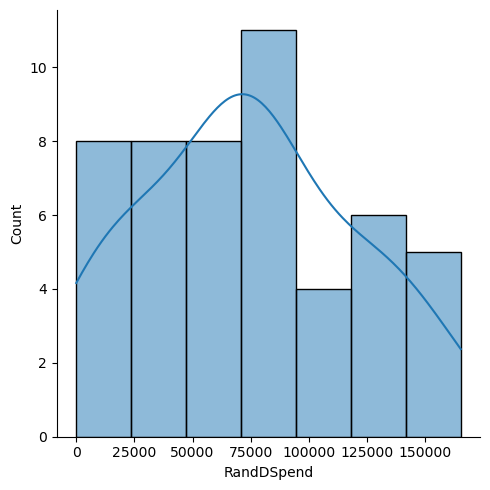

In [23]:
'''displot is a function in the seaborn data visualization library that
creates a histogram with a kernel density plot (also known as a density plot) 
overlaid on top. It allows you to easily visualize the distribution of a univariate set 
of observations, which is particularly useful for exploring the shape
of the data and identifying any outliers or other patterns.'''

#Analyzing RandDSpend
sns.displot(x=data.RandDSpend,kde=True)

this bins tells us that the have spend more number of times on RandDSpend between 75000 and 100000 USD
and  the have spend less on RandDSpend between 100000 and 125000 USD

Kernel density estimation (KDE) is a non-parametric technique used to estimate the probability density function (PDF) of a random variable. It is a method of estimating the underlying probability distribution of a set of continuous or discrete data points, by smoothing out the data using a kernel function.

In KDE, a kernel function is centered at each data point, and the density estimate at any point in the data space is obtained by adding up the contributions of all the kernels centered at each data point. The kernel function is usually a probability density function, such as the Gaussian distribution.

The width of the kernel function, also known as the bandwidth, determines the level of smoothing applied to the data. A wider bandwidth results in a smoother estimate, while a narrower bandwidth leads to a more localized estimate.

KDE is commonly used in data analysis, statistical modeling, and machine learning applications. It is particularly useful when the underlying PDF is unknown or difficult to specify, and when estimating the PDF is important for subsequent analysis or modeling.

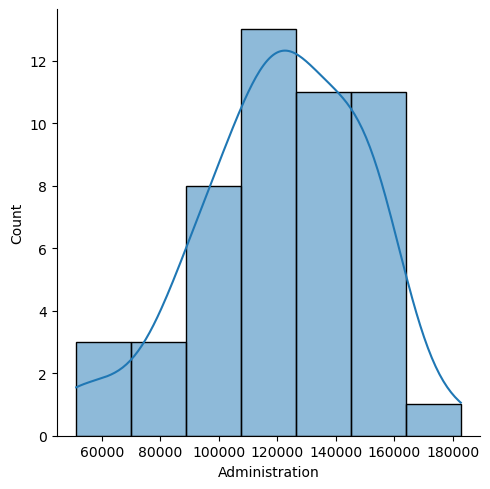

In [24]:
#Analyzing Administration
sns.displot(x=data.Administration,kde=True)

this bins tells us that the have spend more number of times on Administration between 110000 and 130000 USD
and  the have spend less on Administration between 160000 and 180000 USD

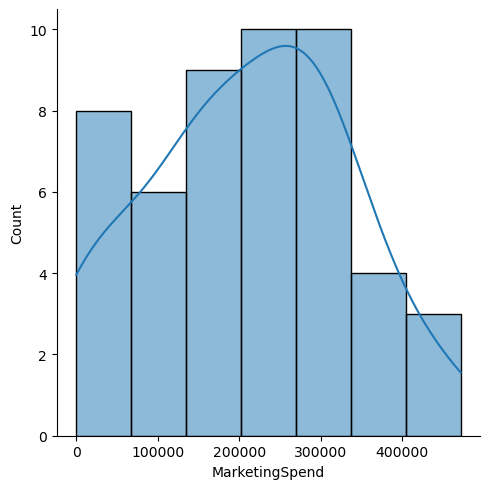

In [26]:
#Analyzing TV
sns.displot(x=data.MarketingSpend,kde=True)

## Step 2 Bivariate Analysis

Bivariate analysis is a statistical method used to determine the relationship between two variables. It involves analyzing two variables simultaneously to determine how they are related to each other. The main objective of bivariate analysis is to determine whether there is a relationship between the two variables and to quantify the strength and direction of that relationship.

Bivariate analysis can be performed using various statistical techniques such as correlation analysis, regression analysis, chi-square test, t-test, and ANOVA (analysis of variance). These techniques can be used to analyze different types of data, including continuous, categorical, and binary data.

The results of bivariate analysis can help in making predictions, identifying trends, and making decisions based on the relationship between the two variables. For example, bivariate analysis can be used to determine the relationship between a person's age and their income or the relationship between a student's grades and their attendance.

Bivariate analysis is an essential tool in many fields, including social sciences, healthcare, finance, marketing, and engineering. It can help in identifying patterns and trends in data, which can be used to make informed decisions and improve outcomes.

In [ ]:

# This step is performed when inputs and output are known.
# 1st variable will be Inputs
# 2nd variable will be output/target variable.

In [27]:
data.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


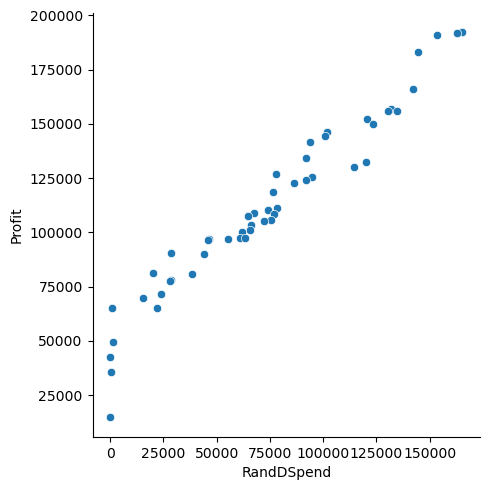

In [28]:
# Analyzing RandDSpend and Profit

'''relplot() is a function in the Python data visualization library Seaborn. 
It is used to create a relational plot, which is a type of plot that displays 
the relationship between two variables. relplot() can create a variety of 
relational plots, including scatter plots, line plots, and categorical plots.'''

sns.relplot(x='RandDSpend',y='Profit',data=data)
# The more marketing on TV is leading to more sales in the product.

in the above plot, we see that there is a relationship between RandDSpend and Profit

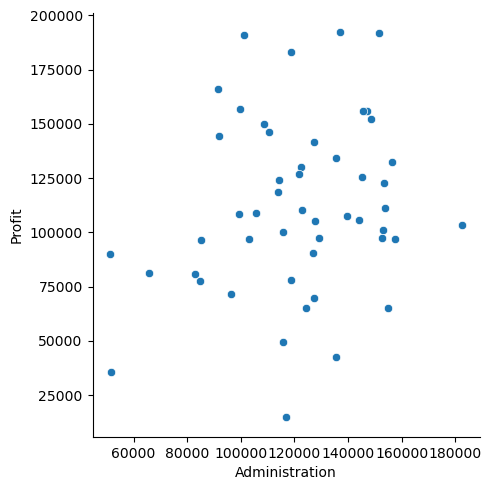

In [29]:
# Analyzing Radio and Sales
sns.relplot(x='Administration',y='Profit',data=data)
# Radio advertisments are not showing much trend for the sales of product.

in the above plot, we see that there is no relationship between Administration and Profit

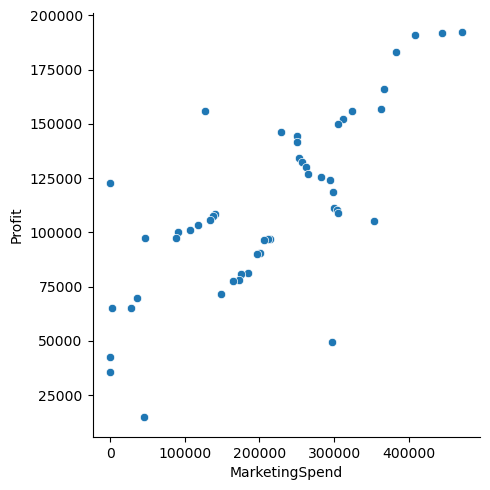

In [30]:
# Analyzing Radio and Sales
sns.relplot(x='MarketingSpend',y='Profit',data=data)
# Radio advertisments are not showing much trend for the sales of product.

in the above plot, we see that there is slightly a relationship between MarketingSpend and Profit

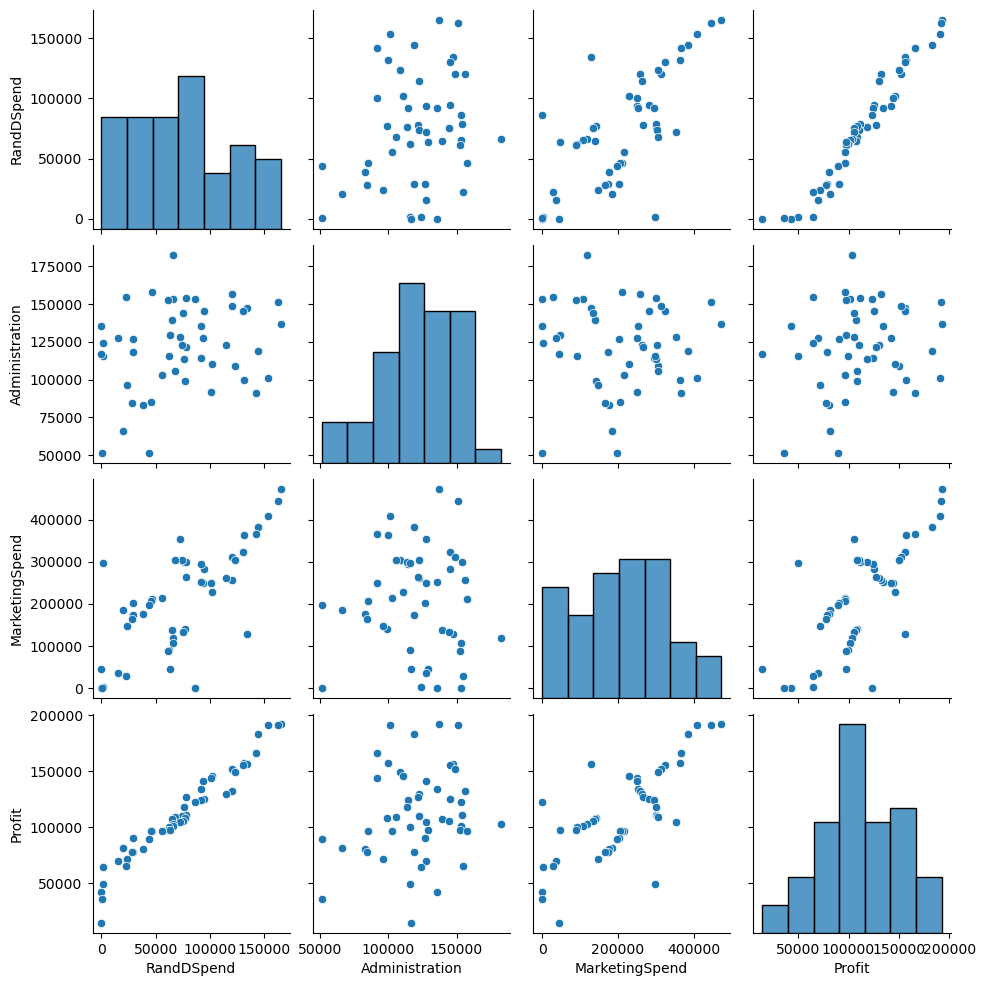

In [31]:
## Step 3 Multivariate Analysizing
sns.pairplot(data)

A pairplot is a type of data visualization technique used in statistics and machine learning to visualize the pairwise relationships between different variables in a dataset. It is a matrix of scatterplots, where each variable is plotted against every other variable in the dataset.

Pairplots are particularly useful for exploring the relationships between multiple variables, as they allow us to quickly identify patterns and correlations between variables. They are often used in exploratory data analysis to gain insights into the underlying structure of the data, and can also be used to identify potential outliers or anomalies.

In a pairplot, each scatterplot shows the relationship between two variables, with the x-axis representing one variable and the y-axis representing the other variable. The diagonal of the pairplot typically shows a histogram or a density plot of each variable, allowing us to visualize the distribution of each variable.

Pairplots can be created using various Python libraries such as seaborn, matplotlib, and pandas. Seaborn is particularly popular for creating pairplots as it provides many built-in customization options and is optimized for statistical visualizations.

# Data Preprocessing and Feature Engineering

In [32]:
'''# Step 1-Finding missing values
isnull() is a method in Python's pandas library used to check for missing or
null values in a DataFrame or a Series. It returns a boolean mask of the same 
shape as the input object, where True represents a missing or null value and
False represents a non-null value.'''
data.isnull().sum()

RandDSpend        0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

in our data set, there is no missing values

In [33]:
data.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Step 3 Checking the outlier

A boxplot is a graphical representation of a dataset that summarizes its distribution, particularly its central tendency, dispersion, and skewness. It is also known as a box-and-whisker plot, and is commonly used in statistical analysis to compare the distribution of multiple datasets or to identify outliers.

A boxplot consists of a rectangular box and two whiskers that extend from the box. The box represents the interquartile range (IQR), which is the middle 50% of the data. The bottom and top of the box represent the first and third quartiles, respectively. The line inside the box represents the median, which is the middle value in the dataset.

The whiskers extend from the box to the smallest and largest observations that are within 1.5 times the IQR from the lower and upper quartiles, respectively. Any observations outside of the whiskers are plotted as individual points and are considered out
sns.boxplot(x='RandDSpend',data=data)

<AxesSubplot:xlabel='RandDSpend'>

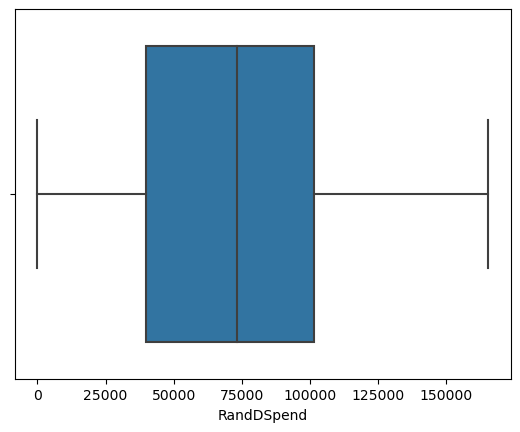

In [66]:
# Step 3 Checking the outlier
sns.boxplot(x='RandDSpend',data=data)

From our observation, we come to conclusion that there is no outliers in RandDSpend data points

<AxesSubplot:xlabel='Administration'>

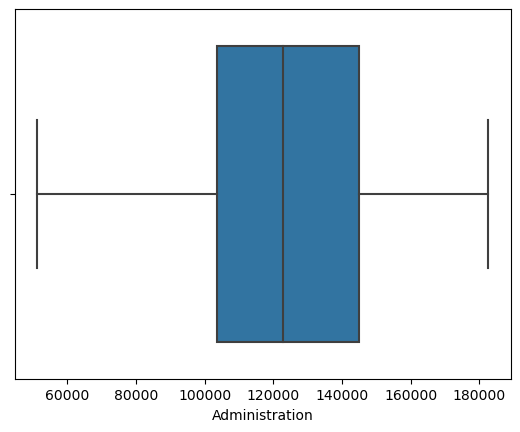

In [35]:
# Step 3 Checking the outlier
sns.boxplot(x='Administration',data=data)

From our observation, we come to conclusion that there is no outliers in Administration data points

<AxesSubplot:xlabel='MarketingSpend'>

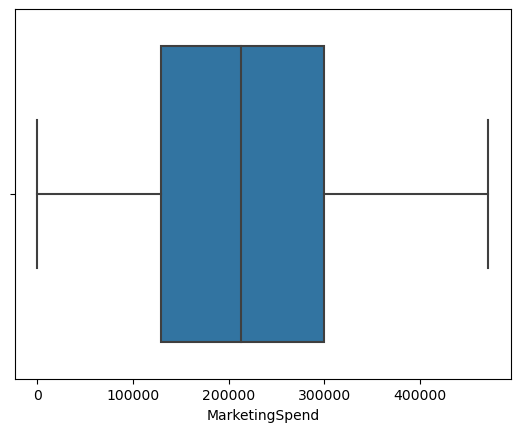

In [37]:
# Step 3 Checking the outlier
sns.boxplot(x='MarketingSpend',data=data)

From our observation, we come to conclusion that there is no outliers in MarketingSpend data points

# Feature Selection

Feature selection is a process in machine learning and data analysis that involves selecting a subset of the most relevant features (or variables) from a larger set of features that are available in a dataset. The goal of feature selection is to reduce the dimensionality of the dataset, simplify the model, and improve its accuracy and performance.

In [38]:
#Step 1 Dropping the unwanted variables
l1=['State']
data.drop(l1,axis=1,inplace=True)

In [40]:
data.head()

,RandDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

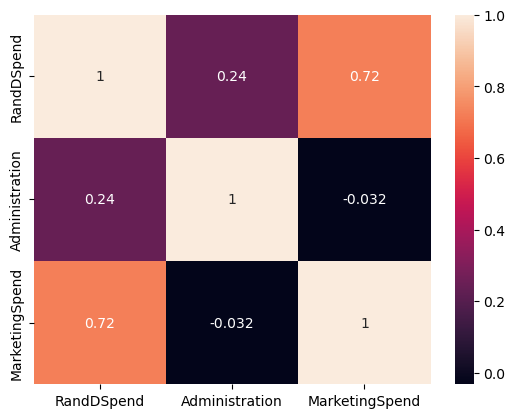

In [41]:
## Step 2 Checking the correlation
sns.heatmap(data.drop('Profit',axis=1).corr(),annot=True)

'''A heatmap is a graphical representation of a matrix or a table in which the values are
represented by colors. It is commonly used in data analysis and visualization to
display complex data sets and highlight patterns and trends in the data.

Heatmaps are particularly useful when working with large datasets, as they can help to 
quickly identify correlations and relationships between different variables in the data. 
They are often used in fields such as finance, biology, and social science, among others.'''

corr() is a method in Pandas, a popular data analysis library in Python, 
that calculates the pairwise correlation between columns of a DataFrame. The correlation
coefficient is a measure of the strength and direction of the linear relationship between
two variables, ranging from -1 to +1.

A correlation of +1 indicates a perfect positive correlation, 
where as one variable increases, so does the other. A correlation of -1 
indicates a perfect negative correlation, where as one variable increases, the 
other decreases. A correlation of 0 indicates no linear correlation between the variables.

In [42]:
data.corr()


,RandDSpend,Administration,MarketingSpend,Profit
RandDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


 * there is a strong  correlation between RandDSpend and profit
 * there is a strong correlation between MarketingSpend and profit



# Model Creation

In [43]:
data.head()

,RandDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [72]:
#Step 1 Independent and dependent variable creation
X=data[['RandDSpend','Administration']] ## X variable contains all inputs
y=data.Profit ## y is output

In [73]:
X.head()

,RandDSpend,Administration
0,165349.20,136897.80
1,162597.70,151377.59
2,153441.51,101145.55
3,144372.41,118671.85
4,142107.34,91391.77


In [74]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

sklearn (short for scikit-learn) is a popular machine learning library in Python that provides a wide range of tools for data analysis, preprocessing, model selection, and evaluation. It is built on top of other scientific computing packages like NumPy, SciPy, and matplotlib.

sklearn provides a consistent interface for performing common machine learning tasks such as classification, regression, clustering, and dimensionality reduction. It includes a large number of algorithms, ranging from simple linear models and decision trees to complex deep learning architectures.

Some of the key features of sklearn include:

    A user-friendly API that makes it easy to build and evaluate machine learning models.
    A wide range of algorithms and pre-processing techniques, allowing for flexible and customizable workflows.
    Built-in functionality for data splitting, cross-validation, and hyperparameter tuning.
    Support for both supervised and unsupervised learning, as well as other advanced techniques like semi-supervised and reinforcement learning.
    Integration with other scientific computing packages like NumPy, Pandas, and matplotlib for efficient data processing and visualization.

Overall, sklearn is a powerful and flexible machine learning library that can be used for a wide range of tasks, from simple data analysis to complex modeling and prediction.

train_test_split is a method in scikit-learn, a popular machine learning library in Python, that splits a dataset into training and testing sets. This method is commonly used to evaluate the performance of machine learning models.

The train_test_split function randomly splits the dataset into two subsets: a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate the performance of the model.

In [75]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [76]:
X_train.shape

(40, 2)

# Creating model

linear_model is a module in the sklearn library that provides various linear models for regression, classification, and other related tasks. It contains a range of linear algorithms including:

    Linear Regression
    Ridge Regression
    Lasso Regression
    Elastic Net Regression
    Logistic Regression
    Linear Discriminant Analysis (LDA)

These algorithms are based on linear assumptions that can be used for various predictive modeling tasks. For example, linear regression can be used to predict a continuous target variable, while logistic regression can be used to predict a binary or categorical target variable.

linear_model also includes tools for regularization and model selection, which can be used to improve the performance of linear models and prevent overfitting.



In [77]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression

LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

Linear regression is a statistical method used to model the relationship between a dependent variable (also known as the response variable or target variable) and one or more independent variables (also known as the explanatory variables or predictors).

The goal of linear regression is to find a linear relationship between the independent variable(s) and the dependent variable. This relationship is expressed in the form of a linear equation, which can be used to make predictions about the dependent variable given values for the independent variable(s).

In its simplest form, linear regression involves fitting a straight line to the data points. However, in more complex cases, multiple regression can be used to fit a plane or hyperplane to the data points.

Linear regression is widely used in many fields, including finance, economics, and engineering, to predict future values or estimate the strength of the relationship between variables.

fit() is a method in machine learning libraries like scikit-learn that is used to train a model on a given dataset. The fit() method takes the input data and output data as arguments and fits the model to the training data. During this process, the model learns the relationship between the input data and output data, and tries to minimize the error between the predicted output and actual output.

For example, in linear regression, the fit() method takes the input data (independent variable) and output data (dependent variable) as arguments and fits a linear regression model to the data. The model will try to find the best fit line that can predict the output data from the input data.

After the model is trained using the fit() method, it can be used to make predictions on new data that the model has not seen before. The predict() method is used to make these predictions.

Overall, the fit() method is a crucial step in the machine learning pipeline as it trains the model and prepares it to make accurate predictions on new data.

In [78]:
y_pre_train = LR.predict(X_train)

predict() is a method in machine learning libraries like scikit-learn that is used to make predictions on new data using a trained model.

Once a model is trained using the fit() method on a given dataset, the predict() method can be used to make predictions on new, unseen data. The predict() method takes the input data as an argument and returns the predicted output.

For example, in linear regression, after training the model on the input and output data using the fit() method, we can use the predict() method to predict the output for new input data. The predict() method takes the new input data as an argument and returns the predicted output using the coefficients learned during training.

The predict() method is an important step in the machine learning pipeline, as it enables the model to make predictions on new data that the model has not seen before. This allows the model to be used in real-world scenarios where new data is constantly being generated, and the model needs to make predictions on that data.

In [79]:
y_train # actual output
y_pre_train # predicted output

array([ 99904.42667555, 171016.32617801, 102619.61157059, 189342.11775712,
       106913.79307038, 162009.18237595,  51542.37707153,  87188.44223458,
        88695.94563971, 112296.7513871 ,  73788.50878301,  96731.42182116,
       115242.94308868, 136087.45618947,  66595.03336514, 103349.50302892,
       127297.11184242, 111864.20960069, 114086.59292232,  48923.14762249,
       186515.83748367, 135650.13502061, 126799.85755203,  73404.93248936,
        50084.10748051, 146449.41228584, 128666.75898291, 159150.88902873,
        49539.54885256, 101861.72807361, 110086.24394773,  82945.62497592,
        73046.3256136 , 150721.9031111 , 154428.01644964, 115332.05018131,
        67870.36119969,  48313.44859126, 149951.79623317,  89238.45022196])

In [80]:
y_test # Actual values

42     71498.49
29    101004.64
6     156122.51
19    122776.86
28    103282.38
17    125370.37
2     191050.39
43     69758.98
3     182901.99
21    111313.02
Name: Profit, dtype: float64

In [81]:
y_predict # Values predicted by model

array([ 69781.20391145, 103706.58557952, 162779.30230829, 121449.51307555,
       103108.17725547, 128756.67925339, 180364.28918346,  61809.00646848,
       172047.06817827, 114589.48226649])

# Model Evalution

Model evaluation is the process of assessing the performance of a 
machine learning model. It is important to evaluate a model's performance to ensure that it is accurate, 
reliable, and effective in making predictions on new data.

In [82]:
# Step 4 Model Evalution
 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

r2_score is a popular metric used for evaluating the performance of regression models in machine learning. It is also known as the coefficient of determination and is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

The r2_score function takes two arrays as input - the true values of the dependent variable (actual output) and the predicted values of the dependent variable (predicted output). It then calculates the R-squared value, which is a value between 0 and 1 that indicates how well the model fits the data. An R-squared value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variability in the dependent variable.

For example, in linear regression, the r2_score function can be used to evaluate how well the model fits the data by comparing the predicted output to the actual output. A high R-squared value indicates that the model is a good fit for the data and that it can accurately predict the dependent variable based on the independent variable(s).

Overall, r2_score is a useful metric for evaluating regression models as it provides a measure of the model's goodness of fit and can be used to compare the performance of different models.

Mean_squared_error is a popular metric used for evaluating the performance of regression models in machine learning. It measures the average of the squared differences between the predicted values and the true values of the dependent variable.

The mean_squared_error function takes two arrays as input - the true values of the dependent variable (actual output) and the predicted values of the dependent variable (predicted output). It then calculates the mean of the squared differences between the two arrays.

For example, in linear regression, the mean_squared_error function can be used to evaluate how well the model fits the data by comparing the predicted output to the actual output. A lower mean squared error indicates that the model is better at predicting the dependent variable based on the independent variable(s).

One of the advantages of using mean_squared_error is that it penalizes large errors more heavily than small errors, as it involves squaring the differences. However, since it involves taking the square of the differences, it may not be directly interpretable in terms of the original units of the dependent variable.

Overall, mean_squared_error is a useful metric for evaluating regression models, as it provides a measure of the average error between the predicted and true values and can be used to compare the performance of different models.

In [83]:
r2score # testing score

0.9763661084183356

In [84]:
train_score=r2_score(y_train,y_pre_train) # training score
train_score

0.9387777984585721

In [85]:
X_train.shape,X_test.shape

((40, 2), (10, 2))

In [86]:
X_test.shape

(10, 2)

In [88]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.96)*(10-1)/(10-2-1)
adjusted_r2

0.9485714285714285

In [89]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

37378111.46266996
6113.764099363825


mean_absolute_error is a popular metric used for evaluating the performance of regression models in machine learning. It measures the average of the absolute differences between the predicted values and the true values of the dependent variable.

The mean_absolute_error function takes two arrays as input - the true values of the dependent variable (actual output) and the predicted values of the dependent variable (predicted output). It then calculates the mean of the absolute differences between the two arrays.

For example, in linear regression, the mean_absolute_error function can be used to evaluate how well the model fits the data by comparing the predicted output to the actual output. A lower mean absolute error indicates that the model is better at predicting the dependent variable based on the independent variable(s).

One of the advantages of using mean_absolute_error is that it is more robust to outliers than mean squared error, since it only involves taking the absolute value of the differences. However, since it involves taking the absolute value of the differences, it may not be directly interpretable in terms of the original units of the dependent variable.

Overall, mean_absolute_error is a useful metric for evaluating regression models, as it provides a measure of the average absolute error between the predicted and true values and can be used to compare the performance of different models.

In [90]:
print(mean_absolute_error(y_test,y_predict))

4873.134133500798


In [92]:
pwd

'/Users/mac/Documents/datascienceonecampus/DatamitesTraining/Assignment'